# **Business Insights Amplification** 

## **1. Business Understanding**
The project, Business Insights Amplification, aims to leverage the accumulated transactional data from the year 2019 to derive meaningful insights that empower our client to enhance sales, improve operational efficiency, and identify growth opportunities. The goal is to transform raw data into actionable intelligence, providing a comprehensive view of the business landscape.

##### **Objective:**
To design and deliver a robust end-to-end Business Intelligence solution for our client, GetINNOtized. Through meticulous analysis of the 2019 transactional data, the project aims to answer critical questions, uncover patterns, and deliver strategic recommendations.

##### **Problem Statement:**
The underutilization of 2019 transactional data poses a critical challenge for our client, hindering the identification of growth opportunities, understanding product performance, and optimizing sales strategies, thereby impeding overall sales and operational efficiency.

**The stakeholders**, including GetINNOtized Leadership, Sales and Marketing Teams, Logistics Department, Product Development Team, and Finance Department, collectively play pivotal roles in leveraging actionable insights derived from the analysis of 2019 transactional data to drive business growth, optimize sales strategies, and enhance overall operational efficiency.

**<span style="font-size: Business Analystics Question to be answered:>;">Business Analystics Question to be answered:></span>**

1. How much money did we make this year? 

2. Can we identify any seasonality in the  sales? 

3. What are our best and worst-selling products? 

4. How do sales compare to previous months or weeks? 

5. Which cities are our products delivered to most? 

6. How do product categories compare in revenue generated and quantities  ordered? 

7. You are required to show additional details from your findings in your data.

## **2. Data Understanding**

**I. Installations and Importations**

In [120]:
#Install pyodbc and python-dotenv
%pip install pyodbc  
%pip install python-dotenv
import warnings 

warnings.filterwarnings('ignore')

In [121]:
#Importing the necessary Libraries.
#import the dotenv_values function from the dotenv package
import pyodbc                    
from dotenv import dotenv_values 

#Dataloading and preparing libraries
import pandas as pd
import numpy as np
import os
import warnings 
import zipfile
import missingno as msno
#Vizualiation Libraries
import matplotlib.pyplot as plt
import re
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib.ticker import FuncFormatter

**II. Loading Datasets**

Loading datasets from the folder and database

In [122]:
#lOADING JAN - JUNE 2019 from zipfile
# Path to your zipfile
zip_path = "./datasets.zip"
# Initialize the ZipFile object
with zipfile.ZipFile(zip_path, 'r') as zip_ref:

    # Read the 'train.csv' file from the ZIP archive
    with zip_ref.open('Sales_January_2019.csv') as jan:
        jan_19 = pd.read_csv(jan)#index_col = 'date',parse_dates =True)

    with zip_ref.open('Sales_February_2019.csv') as feb:
        feb_19 = pd.read_csv(feb)#index_col = 'date',parse_dates =True)

    with zip_ref.open('Sales_March_2019.csv') as march:
        mar_19 = pd.read_csv(march)#index_col = 'date',parse_dates =True)
    with zip_ref.open('Sales_April_2019.csv') as april:
        april_19 = pd.read_csv(april)#index_col = 'date',parse_dates =True)

    with zip_ref.open('Sales_May_2019.csv') as may:
        may_19 = pd.read_csv(may)#index_col = 'date',parse_dates =True)

    with zip_ref.open('Sales_June_2019.csv') as june:
        june_19 = pd.read_csv(june)#index_col = 'date',parse_dates =True)

In [123]:
#Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
# Get the values for the credentials you set in the '.env' file
database=environment_variables.get("DATABASE")
server=environment_variables.get("SERVER")
username=environment_variables.get("USERNAME")
password=environment_variables.get("PASSWORD")


connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [124]:
#connecting to the database
connection=pyodbc.connect(connection_string)

In [125]:
# SQL query to select data from multiple tables for the second half of 2019
query = '''
    SELECT * FROM dbo.Sales_July_2019
    WHERE [Order_Date] >= '2019-07-01' AND [Order_Date] < '2019-08-01'
    UNION ALL
    SELECT * FROM dbo.Sales_August_2019
    WHERE [Order_Date] >= '2019-08-01' AND [Order_Date] < '2019-09-01'
    UNION ALL
    SELECT * FROM dbo.Sales_September_2019
    WHERE [Order_Date] >= '2019-09-01' AND [Order_Date] < '2019-10-01'
    UNION ALL
    SELECT * FROM dbo.Sales_October_2019
    WHERE [Order_Date] >= '2019-10-01' AND [Order_Date] < '2019-11-01'
    UNION ALL
    SELECT * FROM dbo.Sales_November_2019
    WHERE [Order_Date] >= '2019-11-01' AND [Order_Date] < '2019-12-01'
    UNION ALL
    SELECT * FROM dbo.Sales_December_2019
    WHERE [Order_Date] >= '2019-12-01' AND [Order_Date] < '2020-01-01'
'''
second_half_2019=pd.read_sql(query,connection)

In [126]:
second_half_2019.head(10)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222957,AAA Batteries (4-pack),1,2.99,2019-07-19 10:11:00.0000000,"143 5th St, Portland, OR 97035"
1,222975,Wired Headphones,1,11.99,2019-07-19 16:15:00.0000000,"541 Hickory St, Los Angeles, CA 90001"
2,222990,AAA Batteries (4-pack),2,2.99,2019-07-19 18:33:00.0000000,"419 Jackson St, New York City, NY 10001"
3,223000,AAA Batteries (4-pack),1,2.99,2019-07-19 20:29:00.0000000,"670 10th St, Atlanta, GA 30301"
4,223040,Apple Airpods Headphones,1,150.00,2019-07-19 20:05:00.0000000,"395 West St, Austin, TX 73301"
5,223070,AAA Batteries (4-pack),1,2.99,2019-07-19 08:29:00.0000000,"172 Adams St, Boston, MA 02215"
6,223124,USB-C Charging Cable,1,11.95,2019-07-19 19:28:00.0000000,"593 Ridge St, San Francisco, CA 94016"
7,223174,AAA Batteries (4-pack),1,2.99,2019-07-19 18:44:00.0000000,"532 5th St, Los Angeles, CA 90001"
8,223241,USB-C Charging Cable,1,11.95,2019-07-19 20:33:00.0000000,"651 Washington St, Boston, MA 02215"
9,223254,Flatscreen TV,1,300.00,2019-07-19 20:36:00.0000000,"144 Spruce St, Austin, TX 73301"


In [127]:
#Saving the second half as CSV file
#second_half_2019.to_csv(r'C:/second_half_2019.csv', index=False)


In [128]:
second_half_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3372 entries, 0 to 3371
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          3372 non-null   int64  
 1   Product           3372 non-null   object 
 2   Quantity_Ordered  3372 non-null   int64  
 3   Price_Each        3372 non-null   float64
 4   Order_Date        3372 non-null   object 
 5   Purchase_Address  3372 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 158.2+ KB


In [129]:
#Merging the first half of 2019 dataframes.
months_sales = [jan_19, feb_19, mar_19, april_19, may_19, june_19]

# Concatenate DataFrames vertically (along rows)
first_half_2019 = pd.concat(months_sales, ignore_index=True)
first_half_2019.tail(5)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
85620,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
85621,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
85622,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
85623,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"
85624,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301"


In [130]:
# Check the number of rows in the DataFrame
num_row = second_half_2019.shape[0]
print(num_row)

3372


##### **III. Data Cleaning**
Here we are going to clean our datasets stored as first half and second half of 2019 dataframes

*merging the datasets*

In [131]:
#1. Rename Column names Second half
second_half_2019.rename(columns={'Order_ID': 'Order ID', 'Product': 'Product', 'Quantity_Ordered': 'Quantity Ordered', 'Price_Each': 'Price Each','Order_Date':'Order Date','Purchase_Address':'Purchase Address'}, inplace=True)

#2.Merge datatframes
sales_2019 = pd.concat([first_half_2019, second_half_2019], ignore_index=True)
sales_2019.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [132]:

new_cols = {'Order_ID':'ORDERID','Product':'PRODUCT','Quantity_Ordered':'QUANTITY','Price_Each':'PRICE',
            'Order_Date':'DATE','Purchase_Address':'ADDRESS','Order ID':'ORDERID','Quantity Ordered':'QUANTITY',
            'Price Each':'PRICE','Order Date':'DATE','Purchase Address':'ADDRESS'}

*Checking for missing values*

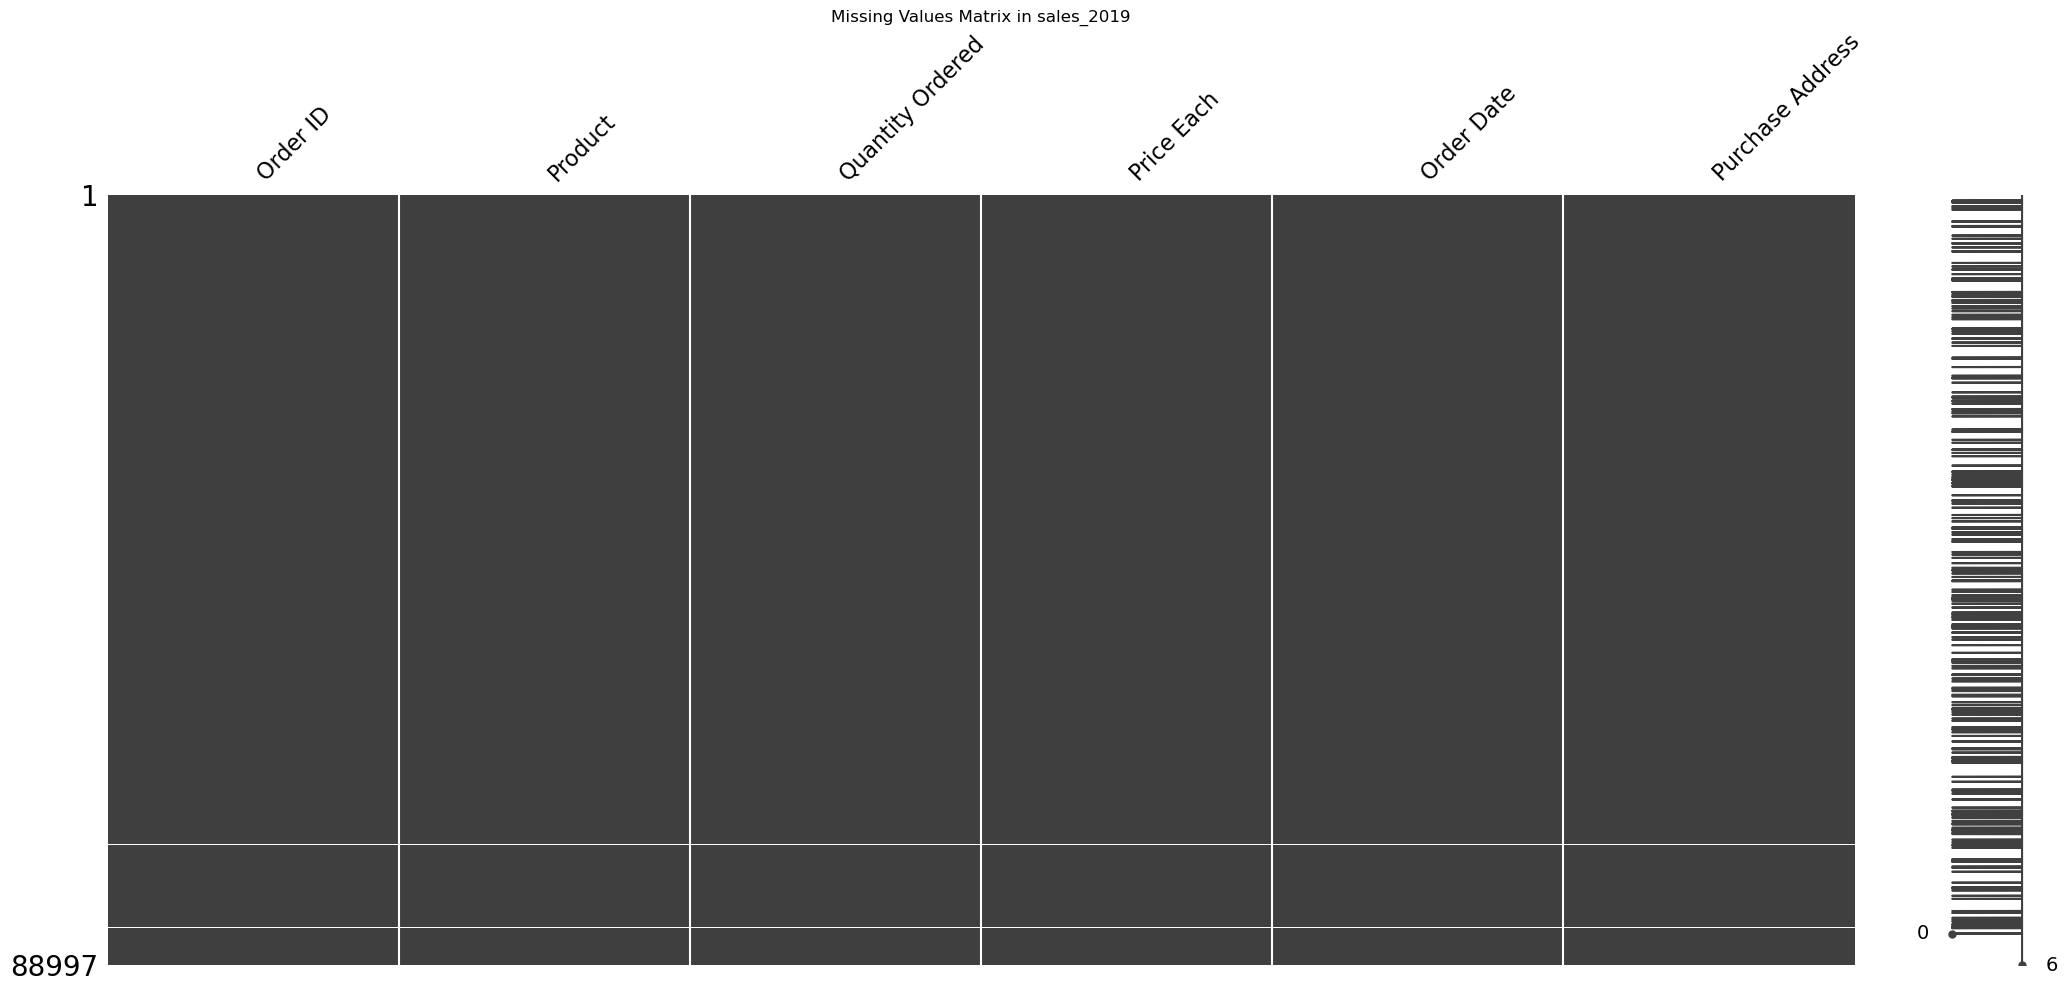

In [133]:
msno.matrix(sales_2019)

# Set plot title
plt.title('Missing Values Matrix in sales_2019')

# Show the plot
plt.show()

In [134]:
sales_2019.isna().sum()

Order ID            245
Product             245
Quantity Ordered    245
Price Each          245
Order Date          245
Purchase Address    245
dtype: int64

In [135]:
# Check the number of rows in the DataFrame
num_rows = sales_2019.shape[0]
print(num_rows)

88997


In [136]:
#drop null values
sales_2019_cleaned = sales_2019.dropna()
#recheck null values
sales_2019_cleaned.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

*checking for Duplicates*

In [137]:
duplicates =sales_2019_cleaned.duplicated()
count_duplicated = duplicates.sum()
print(count_duplicated)

273


In [138]:
#rechecking duplicated data 
duplicated_rows = sales_2019_cleaned[duplicates]
duplicated_rows.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3115,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3247,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3612,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3623,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4126,145143,Lightning Charging Cable,1,14.95,01/06/19 03:01,"182 Jefferson St, San Francisco, CA 94016"


In [139]:
#removing duplicated rows
# Assuming sales_2019_cleaned is your DataFrame without missing values
sales_2019_df = sales_2019_cleaned.drop_duplicates()

# Display the DataFrame without duplicated rows
sales_2019_df.duplicated().sum()

0

*checking for dataset datatypes*

In [140]:
sales_2019_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [141]:
sales_2019_df['Price Each'].unique(), sales_2019_df['Order Date'].unique(),sales_2019_df['Product'].unique(),sales_2019_df['Quantity Ordered'].unique(),sales_2019_df['Order ID'].unique(),sales_2019_df['Purchase Address'].unique(),sales_2019_df['Order Date'].unique()

(array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
        '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
        '379.99', '999.99', '600.0', 'Price Each', '700.0', '150.0',
        '300.0', '1700.0', 2.990000009536743, 11.989999771118164, 150.0,
        11.949999809265137, 300.0, 389.989990234375, 379.989990234375,
        149.99000549316406, 3.8399999141693115, 109.98999786376953,
        99.98999786376953, 14.949999809265137, 600.0, 999.989990234375,
        700.0, 1700.0, 400.0], dtype=object),
 array(['01/22/19 21:25', '01/28/19 14:15', '01/17/19 13:33', ...,
        '2019-12-19 07:48:00.0000000', '2019-12-19 00:18:00.0000000',
        '2019-12-19 21:09:00.0000000'], dtype=object),
 array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
        '27in FHD Monitor', 'AAA Batteries (4-pack)',
        '27in 4K Gaming Monitor', 'USB-C Charging Cable',
        'Bose SoundSport Headphones', 'Apple Airpods Headphones',
        'Macbook Pro Lap

In [142]:
#removing the row with column names as data entries
rows_with_column_names = sales_2019_df[sales_2019_df.isin(sales_2019_df.columns).any(axis=1)]

# Remove rows where column names appear as data entries
sales_2019_df = sales_2019_df[~sales_2019_df.isin(sales_2019_df.columns).any(axis=1)]

# Display the rows with column names and the cleaned DataFrame
print("Rows with Column Names:")
print(rows_with_column_names)

print("\nDataFrame after Cleaning:")
print(sales_2019_df)

Rows with Column Names:
      Order ID  Product  Quantity Ordered  Price Each  Order Date  \
1073  Order ID  Product  Quantity Ordered  Price Each  Order Date   

      Purchase Address  
1073  Purchase Address  

DataFrame after Cleaning:
      Order ID                     Product Quantity Ordered Price Each  \
0       141234                      iPhone                1        700   
1       141235    Lightning Charging Cable                1      14.95   
2       141236            Wired Headphones                2      11.99   
3       141237            27in FHD Monitor                1     149.99   
4       141238            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
88992   319460  Bose SoundSport Headphones                1  99.989998   
88993   319468            Wired Headphones                1      11.99   
88994   319579    Lightning Charging Cable                1      14.95   
88995   319619      

In [143]:
#changing numerical columns to floats to make them to numerical
numerical_columns = ['Quantity Ordered', 'Price Each']  # Replace with your actual column names

# Convert numerical columns to float
sales_2019_df[numerical_columns] = sales_2019_df[numerical_columns].astype(float)

# Check the data types after the conversion
print(sales_2019_df.dtypes)

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object


*Order Date Conversion - Datetime*

In [144]:
# Convert the date column to a datetime format if it's not already
sales_2019_df['Order Date'] = pd.to_datetime(sales_2019_df['Order Date'])

sales_2019_df['Order Date']

0       2019-01-22 21:25:00
1       2019-01-28 14:15:00
2       2019-01-17 13:33:00
3       2019-01-05 20:33:00
4       2019-01-25 11:59:00
                ...        
88992   2019-12-19 19:31:00
88993   2019-12-19 10:35:00
88994   2019-12-19 19:28:00
88995   2019-12-19 21:09:00
88996   2019-12-19 18:21:00
Name: Order Date, Length: 88478, dtype: datetime64[ns]

##### **IV. EDA Analysis**

In [145]:
#Statistical analysis
sales_2019_df.describe(include= 'all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Order ID,88478,84909,160873,5,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,88478,19,USB-C Charging Cable,10332,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity Ordered,88478.0,NaN,NaN,NaN,NaT,NaT,1.125048,0.439837,1.0,1.0,1.0,1.0,9.0
Price Each,88478.0,NaN,NaN,NaN,NaT,NaT,185.523855,333.11901,2.99,11.95,14.95,150.0,1700.0
Order Date,88478,69008,2019-04-02 13:24:00,7,2019-01-01 03:07:00,2019-12-19 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase Address,88478,75519,"284 Walnut St, San Francisco, CA 94016",6,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
sales_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88478 entries, 0 to 88996
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          88478 non-null  object        
 1   Product           88478 non-null  object        
 2   Quantity Ordered  88478 non-null  float64       
 3   Price Each        88478 non-null  float64       
 4   Order Date        88478 non-null  datetime64[ns]
 5   Purchase Address  88478 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 4.7+ MB


2 attributes are numerical i.e Quantity Ordered and Price Each, 3 object attributes and one in datettime type

array([[<AxesSubplot:title={'center':'Quantity Ordered'}>,
        <AxesSubplot:title={'center':'Price Each'}>,
        <AxesSubplot:title={'center':'Order Date'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

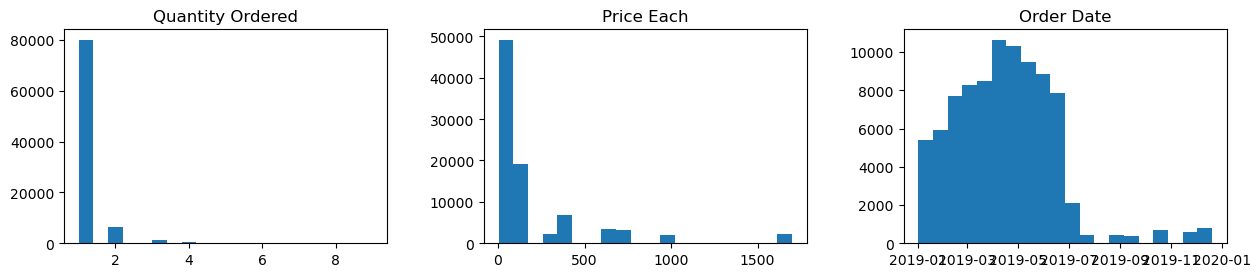

In [147]:
#visualizing the distribution of the numerical attributes
sales_2019_df.hist(bins = 20,figsize=(15, 10), layout=(3, 3), grid= False)

- Most of the attributes are Skewed to the Right (Positively Skewed): The right tail is longer or fatter than the left, indicating a concentration of data on the left side. These are Quantity Ordered. Price Each and Order date.

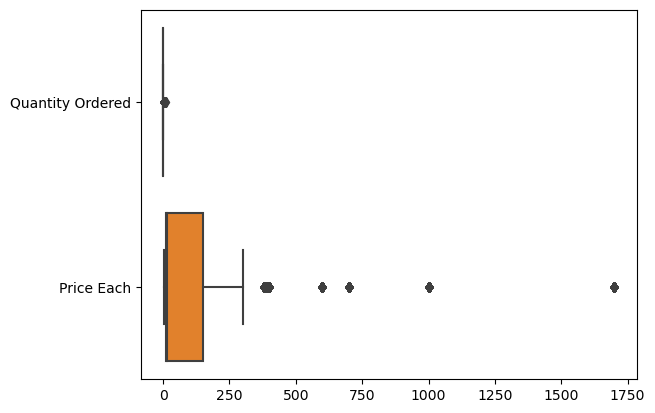

<Figure size 1000x1200 with 0 Axes>

In [148]:
#using the box plot to visualize for presence of outliers
sns.boxplot(data = sales_2019_df, orient= 'h')
plt.figure(figsize=(10,12))
plt.show()

There are outliers in the 'unit price' column, as evidenced by values that deviate significantly from the Interquartile Range (IQR). These outliers may indicate potential anomalies or extreme values in the distribution of unit prices.

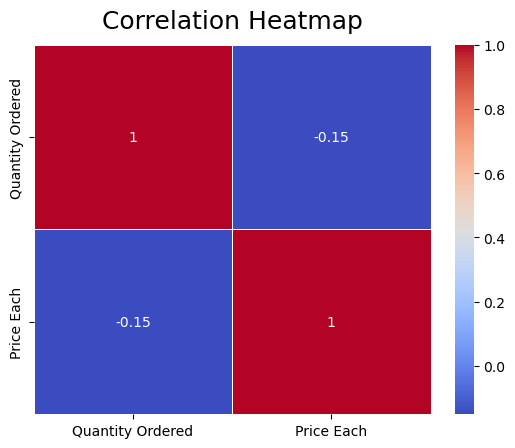

In [149]:
#Using a heatmap to show correlation of the attributes
#Filtering only numerical attributes
numeric_train = sales_2019_df.select_dtypes(include='number')
corr = numeric_train.corr()
heatmap =sns.heatmap(corr,annot = True, cmap = 'coolwarm',linewidths=.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)
plt.show()

There is weak correlation among Quantities ordered and unit price  with a correlation of -0.15

##### **v. Feature Engineering**
Here we going to add a new column **Total Sales** and Categorize the Product column to two Categories i.e **High level if prices are higher $99.99 or below $99.99 as basic level products** and also add new column of **Cities Delivered** as a split of purchase address. Getting date features to include Month, Week of the year, and day

*Getting date features*

In [150]:
# Function to get date features
def getDatefeatures(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column])
    df['Month'] = df[date_column].dt.month
    df['Week_of_year'] = df[date_column].dt.isocalendar().week  
    df['Day_of_week'] = df[date_column].dt.day_name()
    return df

sales_2019_df = getDatefeatures(sales_2019_df, 'Order Date')

# Display the resulting DataFrame
sales_2019_df.head(5)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Week_of_year,Day_of_week
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,4,Tuesday
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,5,Monday
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,3,Thursday
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,1,Saturday
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,4,Friday


*Getting City from Purchase address*

In [151]:
# Create new columns in the existing DataFrame
sales_2019_df[['Street Name', 'City', 'State']] = sales_2019_df['Purchase Address'].str.split(', ', expand=True)

sales_2019_df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Week_of_year,Day_of_week,Street Name,City,State
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,4,Tuesday,944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,5,Monday,185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,3,Thursday,538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,1,Saturday,738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,4,Friday,387 10th St,Austin,TX 73301


*Categorize the Products as high level and basic level*

In [152]:
# Add a new column 'Product Category' based on unit price
sales_2019_df['Product Category'] = np.where(sales_2019_df['Price Each'] > 99.99, 'High Level', 'Basic Level')

# Display the modified DataFrame
sales_2019_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Week_of_year,Day_of_week,Street Name,City,State,Product Category
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,4,Tuesday,944 Walnut St,Boston,MA 02215,High Level
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,5,Monday,185 Maple St,Portland,OR 97035,Basic Level
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,3,Thursday,538 Adams St,San Francisco,CA 94016,Basic Level
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,1,Saturday,738 10th St,Los Angeles,CA 90001,High Level
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,4,Friday,387 10th St,Austin,TX 73301,Basic Level


*Calculating Total Sales Column from Price each and amount of goods ordered a day*

In [153]:
#'Total Sales' 
sales_2019_df['Total Sales'] = sales_2019_df['Price Each'] * sales_2019_df['Quantity Ordered']

sales_2019_df['Total Sales']

0        700.000000
1         14.950000
2         23.980000
3        149.990000
4         11.990000
            ...    
88992     99.989998
88993     11.990000
88994     14.950000
88995      2.990000
88996    379.989990
Name: Total Sales, Length: 88478, dtype: float64

## **3. Deriving Business Insights**

**Question 1: How much money did we make this year?**

Total Revenue for the year: $16513908.56


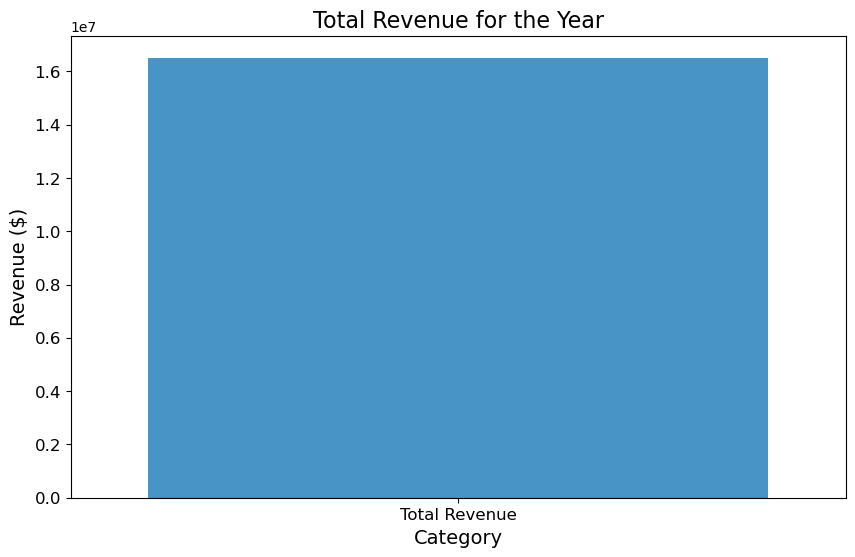

In [154]:
# Calculate total revenue for the year
total_revenue = sales_2019_df['Total Sales'].sum()

print(f'Total Revenue for the year: ${total_revenue:.2f}')

# Visualize total revenue 
plt.figure(figsize=(10, 6))
sns.barplot(x=['Total Revenue'], y=[total_revenue], color='#3498db')  # You can change the color as needed
plt.title('Total Revenue for the Year', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Revenue ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In 2019, the company made A revenue of **$16,513,908.56**

**Question 2: Can we identify any seasonality in the  sales?**

In [155]:
sales_2019_df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

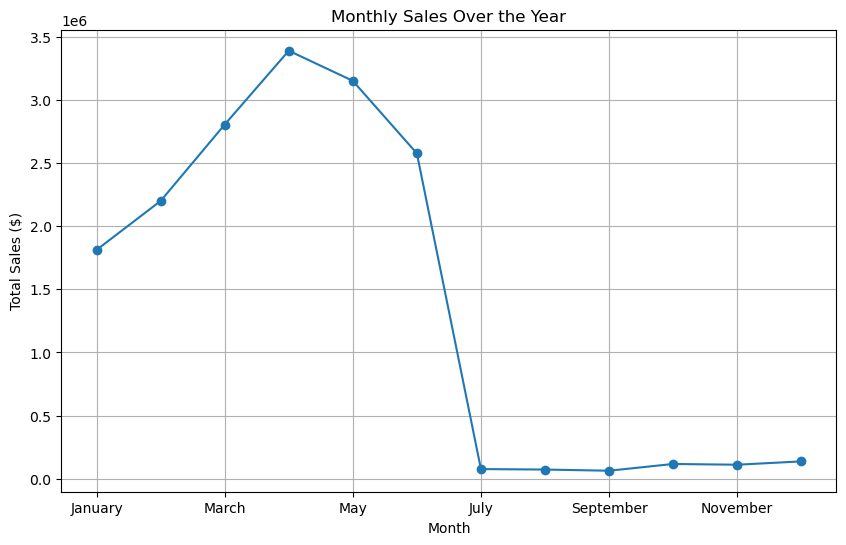

In [156]:
# Convert 'Month' to datetime format
sales_2019_df['Month'] = pd.to_datetime(sales_2019_df['Month'], format='%m')

# Create a categorical variable with month names
month_names = sales_2019_df['Month'].dt.strftime('%B')
sales_2019_df['Month'] = pd.Categorical(month_names, categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)

# Group by month and calculate total sales for each month
monthly_sales = sales_2019_df.groupby('Month')['Total Sales'].sum()

# Plotting the time series
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', linestyle='-')
plt.title('Monthly Sales Over the Year')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

Based on the observed trend in sales, it seems there might be a seasonality pattern in the data. The sales rise from January to April, experience a drop from May to July, remain relatively stable from August to October, and start rising again from November to December. This pattern could indicate some seasonality, possibly influenced by factors such as holidays, special events, or other recurring trends throughout the year

**Question 3: What are our best and worst-selling products?**

In [157]:
# Group by product and calculate total sales
product_sales = sales_2019_df.groupby('Product')['Total Sales'].sum()

# Identify the best-selling product
best_selling_product = product_sales.idxmax()
best_selling_sales = product_sales.max()

# Identify the worst-selling product
worst_selling_product = product_sales.idxmin()
worst_selling_sales = product_sales.min()

print(f"Best-selling product: {best_selling_product} with total sales of ${best_selling_sales:.2f}")
print(f"Worst-selling product: {worst_selling_product} with total sales of ${worst_selling_sales:.2f}")

Best-selling product: Macbook Pro Laptop with total sales of $3811400.00
Worst-selling product: AAA Batteries (4-pack) with total sales of $43947.02


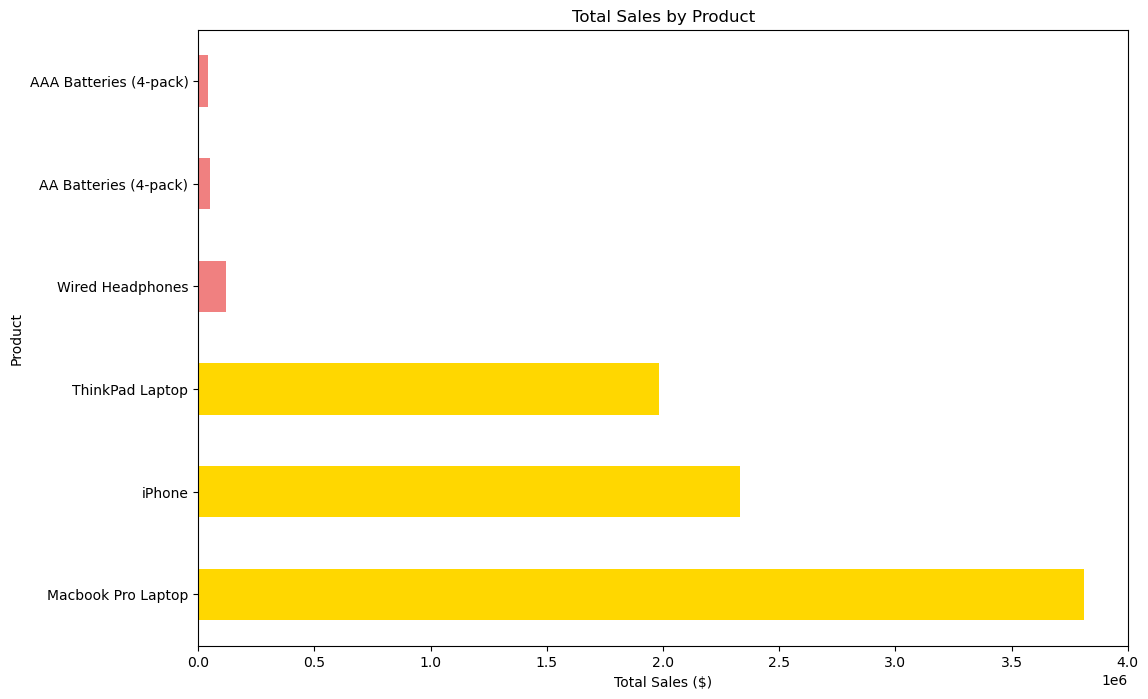

In [158]:
# Identify the top 3 and bottom 3 products
top_3_products = product_sales.nlargest(3).index
bottom_3_products = product_sales.nsmallest(3).index

# Combine the top 3 and bottom 3 products
selected_products = top_3_products.union(bottom_3_products)

# Filter the data for the selected products and sort by total sales
filtered_product_sales = product_sales.loc[selected_products].sort_values(ascending=False)

# Create a color map for unique colors
colors = ['gold' if product in top_3_products else 'lightcoral' for product in filtered_product_sales.index]

# Create a horizontal bar chart with unique colors for top 3 and bottom 3 products
plt.figure(figsize=(12, 8))
filtered_product_sales.plot(kind='barh', color=colors)
plt.title('Total Sales by Product')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product')
plt.show()


Our highest product performer, **the Macbook Pro Laptop**, led the sales chart with a remarkable **total of $3,811,400**. On the flip side, **the AAA Batteries (4-pack)** secured the lowest spot, generating **$43,947** in total sales in the year 2019

**Question 4. How do sales compare to previous months or weeks?**

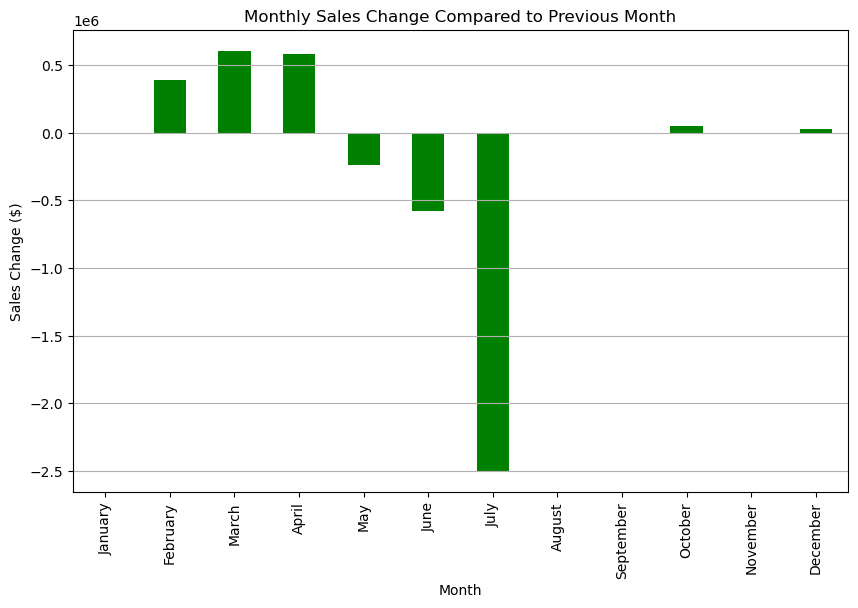

In [159]:
# Calculate monthly sales
monthly_sales = sales_2019_df.groupby('Month')['Total Sales'].sum()

# Calculate the absolute change in sales compared to the previous month
monthly_sales_change = monthly_sales.diff()

# Plotting the monthly sales change as a bar chart
plt.figure(figsize=(10, 6))
monthly_sales_change.plot(kind='bar', color='green')
plt.title('Monthly Sales Change Compared to Previous Month')
plt.xlabel('Month')
plt.ylabel('Sales Change ($)')
plt.grid(axis='y')
plt.show()

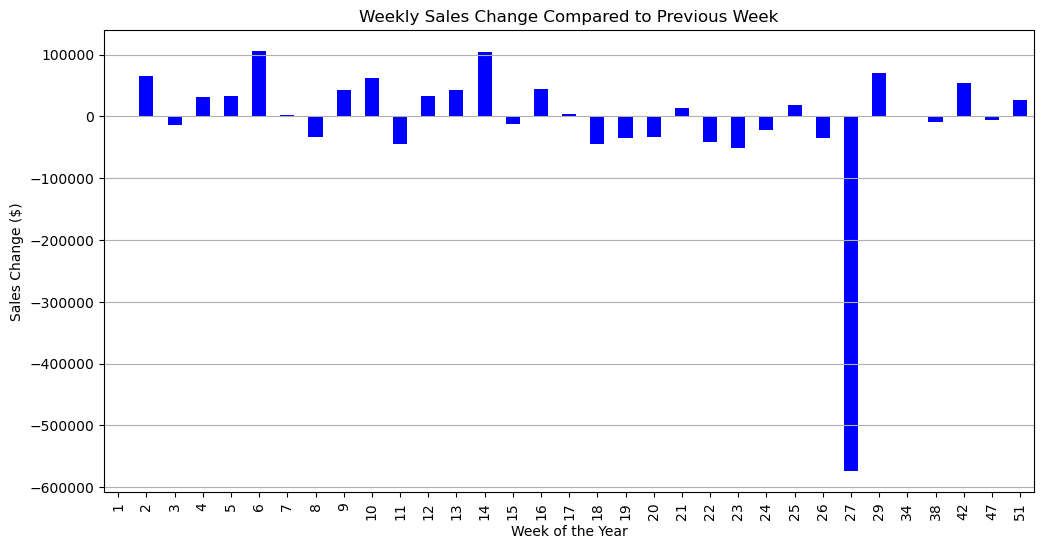

In [160]:
# Calculate weekly sales
weekly_sales = sales_2019_df.groupby('Week_of_year')['Total Sales'].sum()

# Calculate the absolute change in sales compared to the previous week
weekly_sales_change = weekly_sales.diff()

plt.figure(figsize=(12, 6))
weekly_sales_change.plot(kind='bar', color='blue')
plt.title('Weekly Sales Change Compared to Previous Week')
plt.xlabel('Week of the Year')
plt.ylabel('Sales Change ($)')
plt.grid(axis='y')
plt.yticks(rotation=0)
plt.show()

The analysis of monthly and weekly sales changes revealed fluctuating patterns.
- The sales data reveals a strong upward trend in the first four months of the year, followed by a noticeable decline in mid-year, particularly in July. The later months of the year see a stabilized pattern, with a slight increase towards the end, likely influenced by holiday season purchases. 
- Weekly sales indicated periodic increases and decreases, with a significant drop in week 27.

**Question 5. Which cities are our products delivered to most?**

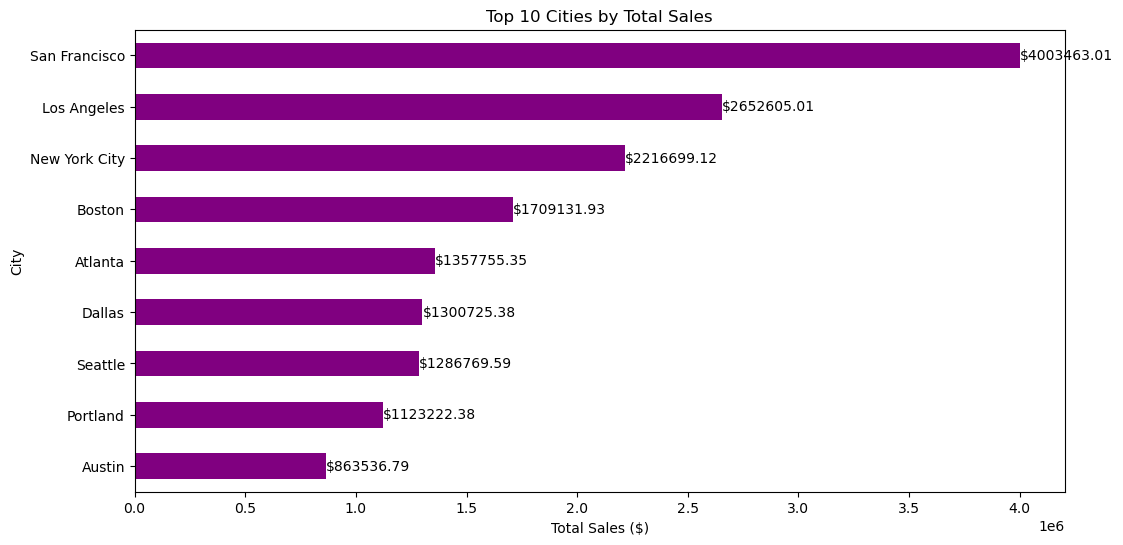

In [161]:
# Group by city and calculate total sales
city_sales = sales_2019_df.groupby('City')['Total Sales'].sum()
# Select the top 10 cities by total sales
top_10_cities = city_sales.sort_values(ascending=False).head(10)

# Plotting a bar chart of total sales for the top 10 cities
plt.figure(figsize=(12, 6))
top_10_cities.sort_values().plot(kind='barh', color='purple')
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('City')
# Display the actual sales values on the bars
for index, value in enumerate(top_10_cities.sort_values()):
    plt.text(value, index, f'${value:.2f}', va='center')
plt.show()

The city of **San Francisco had higher sales** compared to the other cities delivered. The order of 10 most delivered cities is San Francisco, Los Angeles, New York City, Boston, Atlanta, Dallas, Seattle, Portland and Austin bottom of the 10 top most delivered.

**Question 6: How do product categories compare in revenue generated and quantities  ordered?**

*Revenue Generated Vs Product Levels*

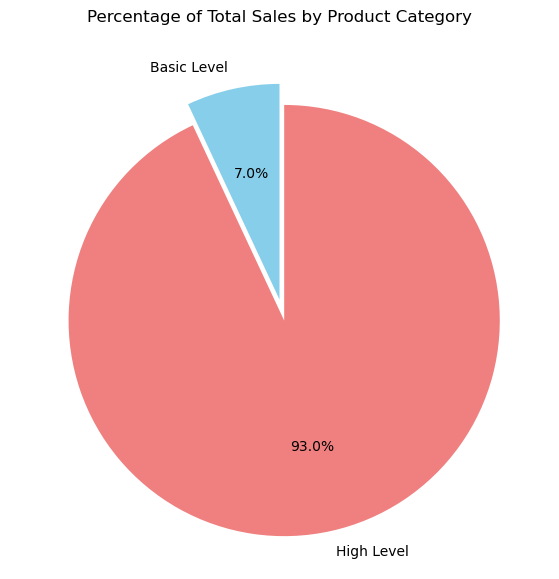

In [162]:
# Group by product category and calculate total sales and total quantity ordered
category_sales_quantity = sales_2019_df.groupby('Product Category').agg({'Total Sales': 'sum', 'Quantity Ordered': 'sum'})

explode = (0., 0.1)  # Exploding the first slice
colors = colors = ['skyblue', 'lightcoral']
# Plotting a pie chart for total sales by product category
plt.figure(figsize=(14, 7))
category_sales_quantity['Total Sales'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Percentage of Total Sales by Product Category')
plt.ylabel('')
plt.show()


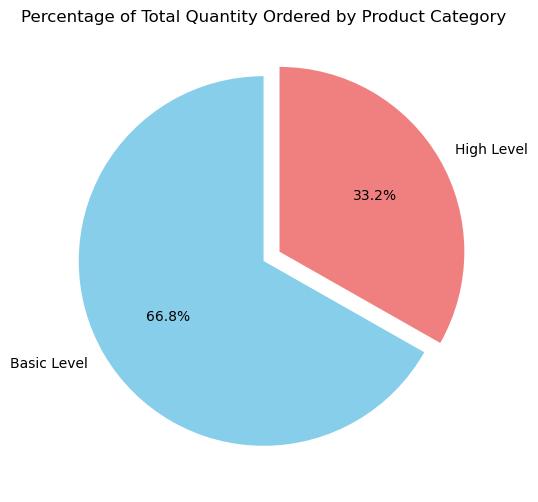

In [163]:

# Plotting a pie chart for total quantity ordered by product category
plt.figure(figsize=(10, 6))
category_sales_quantity['Quantity Ordered'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors,explode =explode)
plt.title('Percentage of Total Quantity Ordered by Product Category')
plt.ylabel('')
plt.show()

In [164]:
# Print sum of orders and revenue generated per category
print("Sum of Orders and Revenue Generated per Category:")
print(category_sales_quantity.astype(int))

Sum of Orders and Revenue Generated per Category:
                  Total Sales  Quantity Ordered
Product Category                               
Basic Level           1150552             66475
High Level           15363355             33067


This breakdown provides a clear overview of the total sales revenue and quantity ordered for products categorized as "Basic Level" and "High Level." "Basic Level" products have generated a total revenue of $1,150,552 from 66,475 orders. On the other hand, "High Level" products have significantly higher total revenue, amounting to $15,363,355, but with a lower quantity of orders, indicating potentially higher-priced items in this category.

#### **More Insights from the dataset**

**1. Customer Preferences in Product Categories - Products in demand per Product level**

*High Level Products and individual orders in the year - Popular and least popular product*

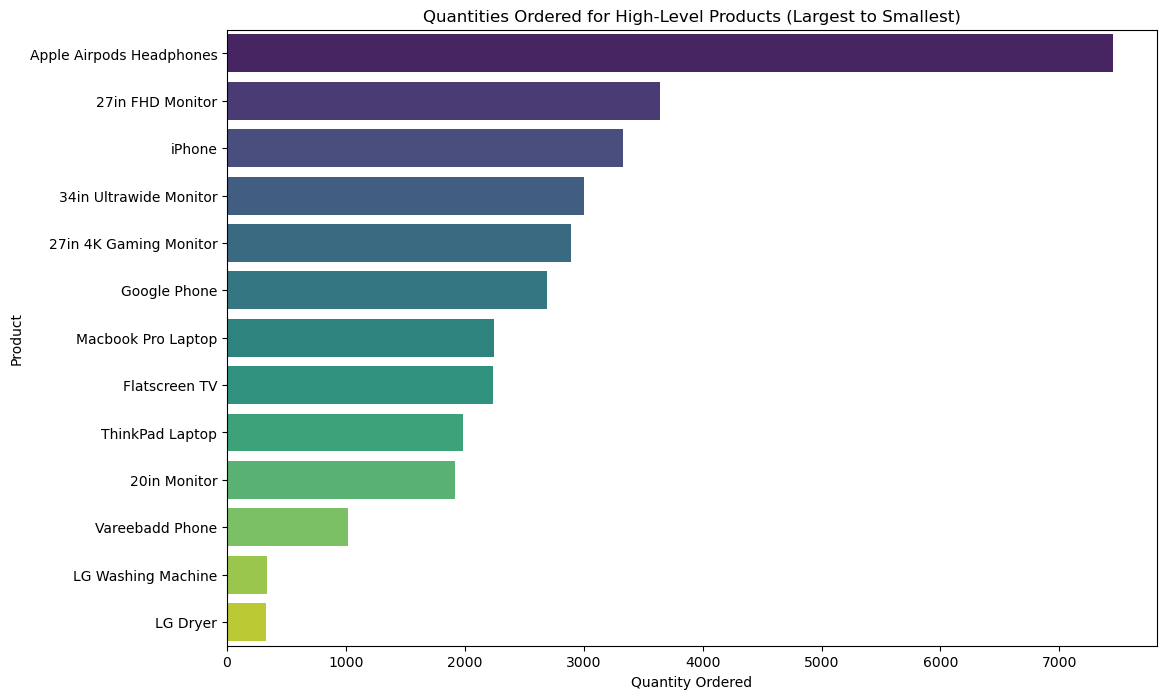

Quantities Ordered for High-Level Products (Largest to Smallest):
Product
Apple Airpods Headphones    7449.0
27in FHD Monitor            3641.0
iPhone                      3331.0
34in Ultrawide Monitor      2998.0
27in 4K Gaming Monitor      2890.0
Google Phone                2695.0
Macbook Pro Laptop          2242.0
Flatscreen TV               2233.0
ThinkPad Laptop             1983.0
20in Monitor                1915.0
Vareebadd Phone             1020.0
LG Washing Machine           339.0
LG Dryer                     331.0
Name: Quantity Ordered, dtype: float64


In [165]:
# Filter data for basic level products
high_level_products = sales_2019_df[sales_2019_df['Product Category'] == 'High Level']
# Calculate quantities ordered for high-level products
high_level_product_quantity = high_level_products.groupby('Product')['Quantity Ordered'].sum()

# Sort quantities from largest to smallest
high_level_product_quantity = high_level_product_quantity.sort_values(ascending=False)

# Plotting a horizontal bar chart for quantities ordered
plt.figure(figsize=(12, 8))
sns.barplot(x=high_level_product_quantity.values, y=high_level_product_quantity.index, palette="viridis")
plt.title('Quantities Ordered for High-Level Products (Largest to Smallest)')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.show()

# Print the values of quantities ordered
print("Quantities Ordered for High-Level Products (Largest to Smallest):")
print(high_level_product_quantity)

The quantities ordered for high-level products indicate that Apple Airpods Headphones are the most popular, followed by various monitors, iPhones, and other electronic devices. The ranking provides valuable insights into customer preferences and product demand within the high-level product category.

*Basic Level Products and individual orders in the year - Popular and least popular product*

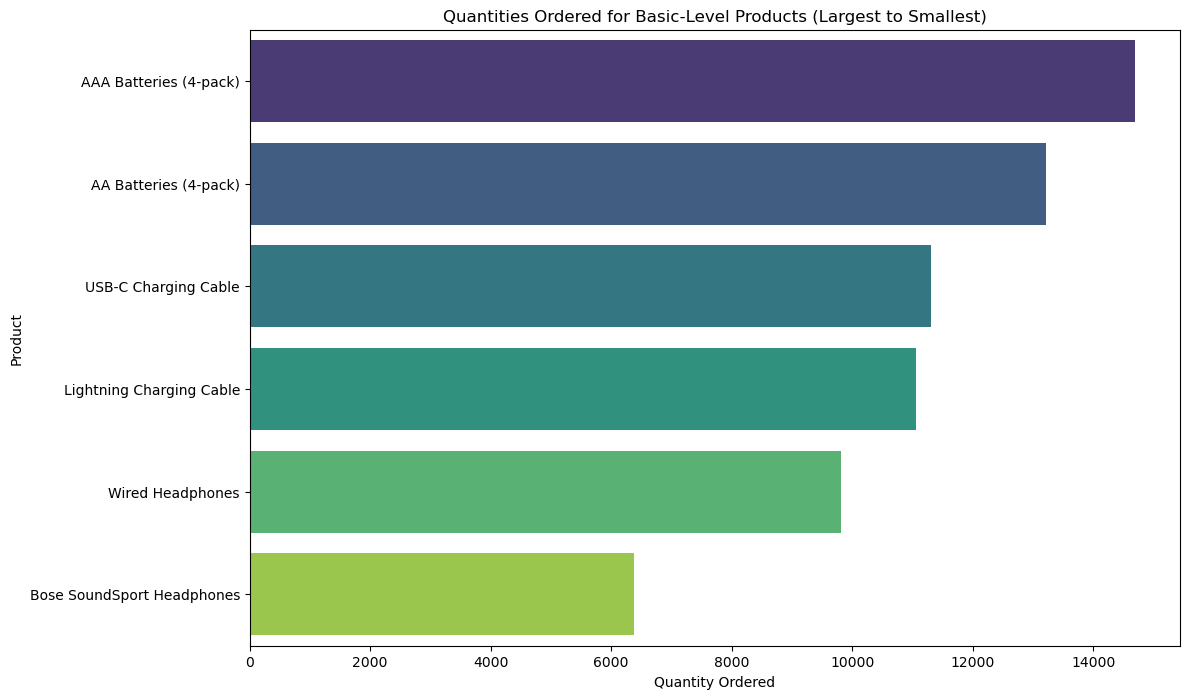

Quantities Ordered for Basic-Level Products (Largest to Smallest):
Product
AAA Batteries (4-pack)        14698.0
AA Batteries (4-pack)         13210.0
USB-C Charging Cable          11313.0
Lightning Charging Cable      11060.0
Wired Headphones               9817.0
Bose SoundSport Headphones     6377.0
Name: Quantity Ordered, dtype: float64


In [166]:
# Filter data for basic level products
basic_level_products = sales_2019_df[sales_2019_df['Product Category'] == 'Basic Level']

# Calculate quantities ordered for high-level products
basic_level_product_quantity = basic_level_products.groupby('Product')['Quantity Ordered'].sum()

# Sort quantities from largest to smallest
basic_level_product_quantity = basic_level_product_quantity.sort_values(ascending=False)

# Plotting a horizontal bar chart for quantities ordered
plt.figure(figsize=(12, 8))
sns.barplot(x=basic_level_product_quantity.values, y=basic_level_product_quantity.index, palette="viridis")
plt.title('Quantities Ordered for Basic-Level Products (Largest to Smallest)')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.show()

# Print the values of quantities ordered
print("Quantities Ordered for Basic-Level Products (Largest to Smallest):")
print(basic_level_product_quantity)

In [167]:
#Saving the 2019 SALES DATA FOR POWERBI DASHBOARDING as CSV file
#sales_2019_df.to_csv(r'C:\2019_sales.csv', index=False)

Among basic-level products, AAA Batteries (4-pack) stands out as the most popular, with the highest quantity ordered, while Bose SoundSport Headphones are the least popular among the listed items.

## **CONCLUSION**
The analysis of the sales data for the year 2019 has provided valuable insights into various aspects of the business. Here are some key conclusions:

**1. Seasonal Patterns**: There is a clear seasonal pattern in sales, with higher sales recorded in the first four months and a decline in the middle months. Sales pick up again towards the end of the year, particularly in November and December.

**2. Product Performance**: The Macbook Pro Laptop emerged as the best-selling product, contributing significantly to the total revenue. On the other hand, AAA Batteries (4-pack) had the lowest sales among the listed products.

**3. Product Categories:** High-level products generated much higher total sales than basic-level products. Smartphones, Monitors, and Laptops were the top-performing high-level product categories.

**3. Geographical Insights:** The analysis of cities revealed the top cities where products were delivered, helping in strategic planning and resource allocation.

**4. Sales Changes Over Time:** Weekly and monthly changes in sales were examined, highlighting periods of growth, decline, and stagnation. This information can assist in adjusting marketing and sales strategies.

**5. Product Quantities:** The analysis of quantities ordered for different products provides insights into customer preferences and popularity. Some products, such as Apple Airpods Headphones, demonstrated high demand.

**6. Revenue vs. Quantity:** The quantity ordered and revenue generated were compared for both high-level and basic-level products, shedding light on the relationship between sales volume and revenue.


## **RECOMMENDATIONS**
Based on the insights derived from the analysis, here are some recommendations for improving business performance:

- **Seasonal Marketing Strategies:** Given the observed seasonal patterns, consider tailoring marketing strategies to align with peak seasons. Plan promotions, product launches, or special offers during months with historically higher sales.

- **Product Focus:** Capitalize on the success of high-performing products, such as the Macbook Pro Laptop, by developing complementary products, bundling offers, or promoting accessories to enhance sales.

- **Geographical Expansion:** Identify the top-performing cities and explore opportunities for geographical expansion. Target marketing efforts towards areas with potential for increased sales.

- **Inventory Management:** Efficiently manage inventory based on the popularity and seasonality of products. Ensure an adequate supply of high-demand items during peak seasons while minimizing excess stock during slower periods.

- **Customer Engagement:** Analyze customer preferences and behaviors to enhance customer engagement. Consider loyalty programs, personalized promotions, or product recommendations to drive repeat business.

- **Diversification:** Explore opportunities for product diversification within high-performing categories. Introduce new products or variations to cater to different customer segments and expand the product portfolio.

- **Promotional Events:** Plan and execute promotional events during key sales periods to stimulate demand. Consider collaborating with suppliers or partners to create exclusive deals or limited-time offers.

- **Monitoring and Adaptation:** Continuously monitor sales data and adapt strategies in real-time. Utilize analytics tools to stay informed about changing market trends and customer preferences.

- **Marketing Channels:** Assess the effectiveness of different marketing channels and allocate resources to channels that yield the highest returns. Consider exploring new channels or optimizing existing ones for better reach.

- **Customer Feedback:** Collect and analyze customer feedback to understand satisfaction levels and areas for improvement. Use feedback to make data-driven decisions that enhance the overall customer experience.

Implementing these recommendations in a strategic manner can contribute to increased sales, improved customer satisfaction, and long-term business growth. Regularly reassess the market landscape and adjust strategies accordingly to stay competitive.






